In [1]:
import os
import shutil
import os
 
# get current directory
cwd = os.getcwd()
parent = os.path.dirname(cwd)
parent = os.path.dirname(parent)

src_folder = parent + '\\Generation\\runs\\' 
dst_folder = './src/'
print(src_folder)
print(dst_folder)

# Copy all files from src_folder to dst_folder
for file_name in os.listdir(src_folder):
    shutil.copy(src_folder + file_name, dst_folder)

c:\Users\Edin\OneDrive - University of Edinburgh\Study\Sem3\Project\LLM-for-code-intelligence\Generation\runs\
./src/


In [20]:
exp_name = 'codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java'
sf = f'src/{exp_name}.jsonl'
td = f'tgt/{exp_name.replace("-", "")}'
!python convert_to_pre_eval.py --source_file $sf --target_dir $td


Done.



100%|██████████| 11300/11300 [00:00<00:00, 553926.76jsonline/s]


In [21]:
# import subprocess
sf = f'src/{exp_name}.jsonl'
td = f'tgt/{exp_name.replace("-", "")}'
eval_cmd = f"podman run --rm --network none -v ./{td}:/{td}:rw multipl-e-eval --dir /{td} --output-dir /{td} --recursive"


# # subprocess.run(eval_cmd, shell=True)
print("### EVALUATION COMMAND ###")
print('#',eval_cmd)
print("### EVALUATION COMMAND ###")


### EVALUATION COMMAND ###
# podman run --rm --network none -v ./tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java:/tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java:rw multipl-e-eval --dir /tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java --output-dir /tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java --recursive
### EVALUATION COMMAND ###


In [22]:
### EVALUATION COMMAND ###
# podman run --rm --network none -v ./tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java:/tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java:rw multipl-e-eval --dir /tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java --output-dir /tgt/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java --recursive
### EVALUATION COMMAND ###

In [23]:
# exp_name = 'codegne_finetuned_LoRa_the_stack_java_v3_checkpoint_800_humaneval_java'
sf = f'src/{exp_name}.jsonl'
td = f'tgt/{exp_name.replace("-", "")}'
target_dir = f'{td}'
output_file = f'res/{exp_name}_results.json'
!python pass_k.py $target_dir --output $output_file

Dataset,Pass@k,Estimate,NumProblems,MinCompletions,MaxCompletions
codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java,10,0.18066490040985347,44,7,100
codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java,100,0.29545454545454547,44,7,100
Saved results to res/codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java_results.json


#### Visualize the results

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


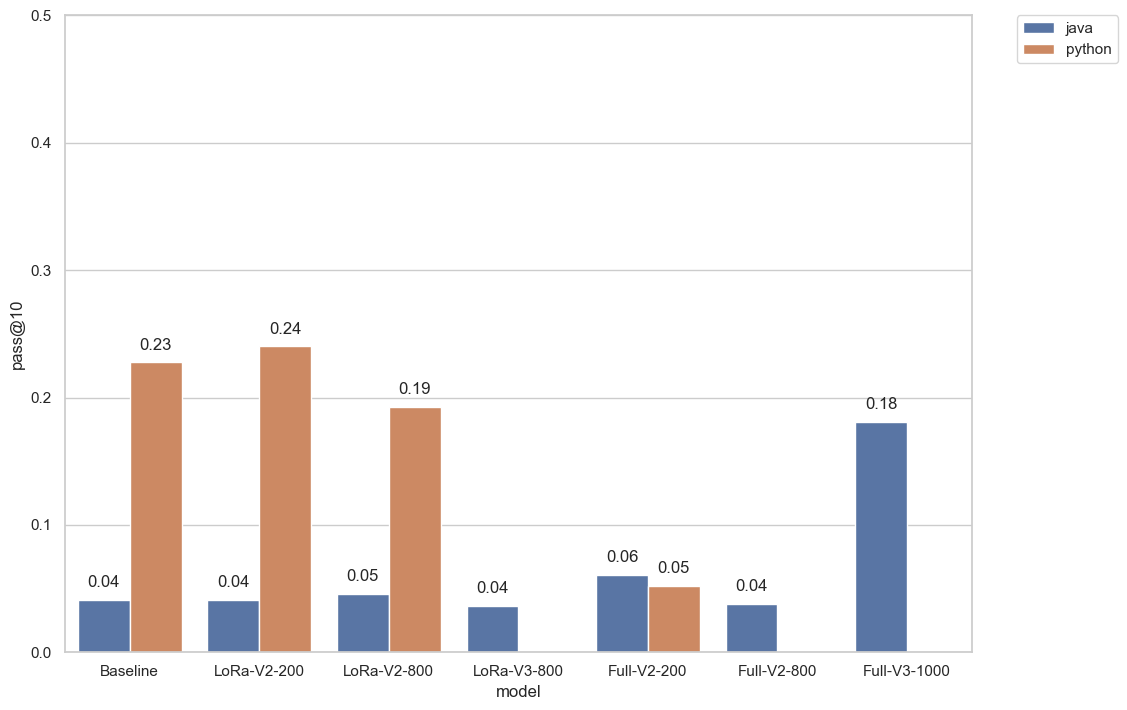

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


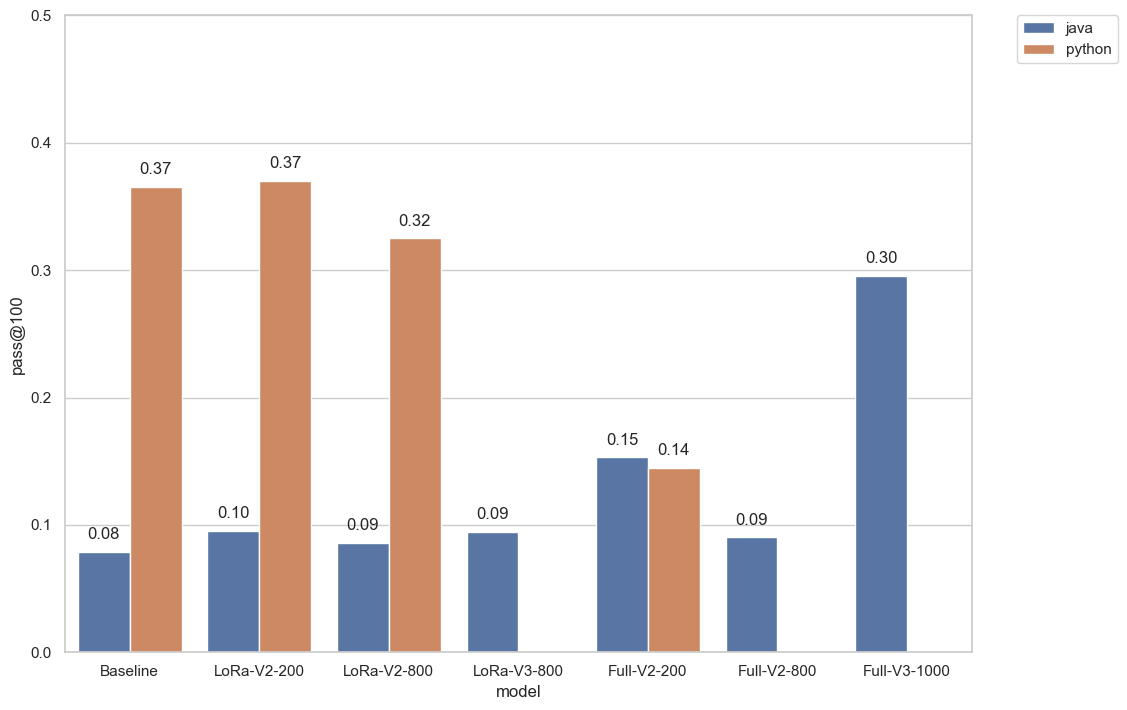

In [24]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


#get all the results files in the res folder
results_files = [f for f in os.listdir('res') if os.path.isfile(os.path.join('res', f))]

#load all the results files into a dictionary
results = {}
for f in results_files:
    with open(os.path.join('res', f)) as json_file:
        results[f] = json.load(json_file)

#Models Short Names
model_names_dict = {
    'codegen_350M_mono_humaneval_py': 'Baseline',
    'codegen_350M_mono_humaneval_java': 'Baseline',

    'codegen_350M_mono_the_stack_dedup_java_train_peft_humaneval_py': 'LoRa-V1',
    'codegen_350M_mono_the_stack_dedup_java_train_peft_humaneval_java': 'LoRa-V1',
    
    'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py': 'Full-V2-200',
    'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java': 'Full-V2-200',

    'codegne_finetuned_the_stack_java_v2_checkpoint_800_humaneval_py': 'Full-V2-800',
    'codegne_finetuned_the_stack_java_v2_checkpoint_800_humaneval_java': 'Full-V2-800',
    
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_200_humaneval_py': 'LoRa-V2-200',
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_200_humaneval_java': 'LoRa-V2-200',

    'codegne_finetuned_LoRa_the_stack_java_v3_checkpoint_800_humaneval_py': 'LoRa-V3-800',
    'codegne_finetuned_LoRa_the_stack_java_v3_checkpoint_800_humaneval_java': 'LoRa-V3-800',

    'codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_py': 'Full-V3-1000',
    'codegne_finetuned_the_stack_java_v3_checkpoint_1000_humaneval_java': 'Full-V3-1000',

    
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_800_humaneval_py': 'LoRa-V2-800',
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_800_humaneval_java': 'LoRa-V2-800',

}


#Merge all the results into a single dataframe
dict_df = {
    'model': [],
    'dataset': [],
    'pass@10': [],
    'pass@100': [],
    'num_problems': [],
    'min_completions': [],
    'max_completions': [],
    'programming_language': []
}

for model in results.keys():
    model_results = results[model]
    model_name = model.split('_results.json')[0]
    if model_name in model_names_dict.keys():
        model_name = model_names_dict[model_name]
    dataset_name = model_results['pass@10']['dataset']
    pass_10 = model_results['pass@10']['estimate']
    pass_100 = model_results['pass@100']['estimate']
    num_problems = model_results['pass@10']['num_problems']
    min_completions = model_results['pass@10']['min_completions']
    max_completions = model_results['pass@10']['max_completions']
    if 'humaneval_py' in dataset_name:
        programming_language = 'python'
    elif 'humaneval_java' in dataset_name:
        programming_language = 'java'
    else:
        programming_language = 'unknown'
    dict_df['model'].append(model_name)
    dict_df['dataset'].append(dataset_name)
    dict_df['pass@10'].append(pass_10)
    dict_df['pass@100'].append(pass_100)
    dict_df['num_problems'].append(num_problems)
    dict_df['min_completions'].append(min_completions)
    dict_df['max_completions'].append(max_completions)
    dict_df['programming_language'].append(programming_language)

df = pd.DataFrame(dict_df)

#Drop the dataset column
df = df.drop(columns=['dataset'])

#Drop the min_completions and max_completions columns
df = df.drop(columns=['min_completions', 'max_completions'])

#Drop the num_problems column
df = df.drop(columns=['num_problems'])

#Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="pass@10", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#set the y axis to start at 0 and end at 0.5
plt.ylim(0, 0.5)
#writer the y values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center")
#plot the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="pass@100", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#set the y axis to start at 0 and end at 0.5
plt.ylim(0, 0.5)
#writer the y values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center")
#plot the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [7]:
df.model.unique()

array(['Baseline', 'LoRa-V2', 'LoRa-V2-800',
       'codegne_finetuned_LoRa_the_stack_java_v3_checkpoint_800_humaneval_java',
       'Full-V2', 'Full-V2-800'], dtype=object)

In [5]:
#drop the rows with LoRa-V2 and Full-V2-800
df = df[df['model'] != 'LoRa-V2']
df = df[df['model'] != 'Full-V2-800']
df

,model,pass@10,pass@100,programming_language
0,Baseline,0.041230,0.078607,java
1,Baseline,0.227548,0.365525,python
4,LoRa-V2-800,0.045918,0.085778,java
5,LoRa-V2-800,0.192794,0.324969,python
6,Full-V2,0.060866,0.153115,java
7,Full-V2,0.052167,0.144856,python


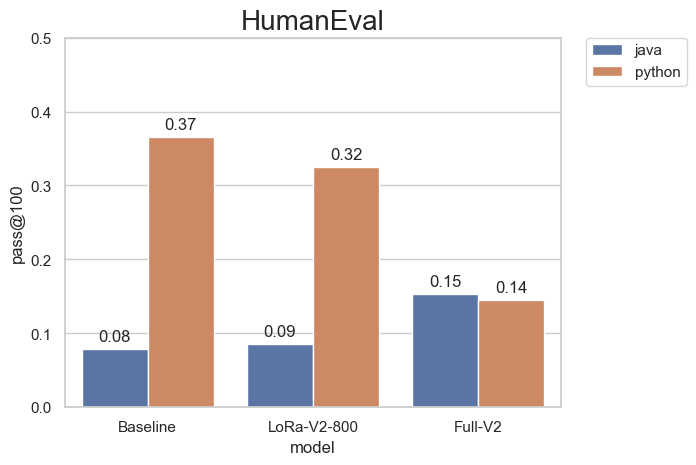

In [9]:
import os

figs_dir = '../../figs'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)
file_name = f'{figs_dir}/multipl-e-eval-results.png'
#Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="pass@100", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#set the y axis to start at 0 and end at 0.5
plt.ylim(0, 0.5)
#writer the y values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center")

# Add title with larger font
ax.set_title('HumanEval', fontdict={'fontsize': 20})
#plot the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#save the figure
plt.savefig(file_name, bbox_inches='tight')
#show the figure
plt.show()



### ALL FLOW

In [ ]:
import os
import shutil
import subprocess

 
# get current directory
cwd = os.getcwd()
parent = os.path.dirname(cwd)
parent = os.path.dirname(parent)

src_folder = parent + '\\Generation\\runs\\' 
dst_folder = './src/'

# Copy all files from src_folder to dst_folder
for file_name in os.listdir(src_folder):
    shutil.copy(src_folder + file_name, dst_folder)


#Loop over all the files in the src folder and get the experiment names to run
for file_name in os.listdir(src_folder):
    exp_name = file_name.split('.jsonl')[0]
    #Print the experiment name
    print(f'Now running experiment: {exp_name}')

    #Convert the jsonl file to the pre-evaluation format
    sf = f'src/{exp_name}.jsonl'
    td = f'tgt/{exp_name.replace("-", "")}'
    print(f'Converting {sf} to {td}')
    !python convert_to_pre_eval.py --source_file $sf --target_dir $td
    print('Done!')

    #Run the evaluation
    print(f'Running evaluation on {td}')
    eval_cmd = f"podman run --rm --network none -v ./{td}:/{td}:rw multipl-e-eval --dir /{td} --output-dir /{td} --recursive"
    subprocess.run(eval_cmd, shell=True)
    print('Done!')

    #Run the pass@k
    print(f'Running pass@k on {td}')
    target_dir = f'{td}'
    output_file = f'res/{exp_name}_results.json'
    !python pass_k.py $target_dir --output $output_file
    print('Done!')

    

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


#get all the results files in the res folder
results_files = [f for f in os.listdir('res') if os.path.isfile(os.path.join('res', f))]

#load all the results files into a dictionary
results = {}
for f in results_files:
    with open(os.path.join('res', f)) as json_file:
        results[f] = json.load(json_file)

#Models Short Names
model_names_dict = {
    'codegen_350M_mono_humaneval_py': 'Baseline',
    'codegen_350M_mono_humaneval_java': 'Baseline',

    'codegen_350M_mono_the_stack_dedup_java_train_peft_humaneval_py': 'LoRa-V1',
    'codegen_350M_mono_the_stack_dedup_java_train_peft_humaneval_java': 'LoRa-V1',
    
    'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_py': 'Full-V2',
    'codegne_finetuned_the_stack_java_v2_checkpoint_200_humaneval_java': 'Full-V2',
    
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_200_humaneval_py': 'LoRa-V2',
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_200_humaneval_java': 'LoRa-V2',

    
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_800_humaneval_py': 'LoRa-V2-800',
    'codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_800_humaneval_java': 'LoRa-V2-800',

}


#Merge all the results into a single dataframe
dict_df = {
    'model': [],
    'dataset': [],
    'pass@10': [],
    'pass@100': [],
    'num_problems': [],
    'min_completions': [],
    'max_completions': [],
    'programming_language': []
}

for model in results.keys():
    model_results = results[model]
    model_name = model.split('_results.json')[0]
    if model_name in model_names_dict.keys():
        model_name = model_names_dict[model_name]
    dataset_name = model_results['pass@10']['dataset']
    pass_10 = model_results['pass@10']['estimate']
    pass_100 = model_results['pass@100']['estimate']
    num_problems = model_results['pass@10']['num_problems']
    min_completions = model_results['pass@10']['min_completions']
    max_completions = model_results['pass@10']['max_completions']
    if 'humaneval_py' in dataset_name:
        programming_language = 'python'
    elif 'humaneval_java' in dataset_name:
        programming_language = 'java'
    else:
        programming_language = 'unknown'
    dict_df['model'].append(model_name)
    dict_df['dataset'].append(dataset_name)
    dict_df['pass@10'].append(pass_10)
    dict_df['pass@100'].append(pass_100)
    dict_df['num_problems'].append(num_problems)
    dict_df['min_completions'].append(min_completions)
    dict_df['max_completions'].append(max_completions)
    dict_df['programming_language'].append(programming_language)

df = pd.DataFrame(dict_df)

#Drop the dataset column
df = df.drop(columns=['dataset'])

#Drop the min_completions and max_completions columns
df = df.drop(columns=['min_completions', 'max_completions'])

#Drop the num_problems column
df = df.drop(columns=['num_problems'])

#Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="pass@10", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#set the y axis to start at 0 and end at 0.5
plt.ylim(0, 0.5)
#writer the y values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center")
#plot the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Plot the results
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="model", y="pass@100", hue="programming_language", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
#set the y axis to start at 0 and end at 0.5
plt.ylim(0, 0.5)
#writer the y values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center")
#plot the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [ ]:
import jsonlines

source_file = 'src/codegne_finetuned_LoRa_the_stack_java_v2_checkpoint_800_humaneval_java.jsonl'

with jsonlines.open(source_file, 'r') as source_reader:
    source_data = list(source_reader)

In [ ]:
source_data[0]

In [ ]:
output_texts = []
for json_data in source_data:
    output_texts.append(json_data['output_text'])

print(len(output_texts))

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codegen-350M-mono")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
max_output_text_len = 0
max_output_text_num_tokens = 0
num_tokens_distribution = []
for output_text in output_texts:
    if len(output_text) > max_output_text_len:
        max_output_text_len = len(output_text)
    num_tokens = len(tokenizer.encode(output_text))
    num_tokens_distribution.append(num_tokens)
    if num_tokens > max_output_text_num_tokens:
        max_output_text_num_tokens = num_tokens


print(max_output_text_len)
print(max_output_text_num_tokens)
print(np.mean(num_tokens_distribution))

In [ ]:
#precntage of output texts with less than 100 tokens
print(len([x for x in num_tokens_distribution if x < 150])/len(num_tokens_distribution))

In [ ]:
#Plot the token distribution
plt.hist(num_tokens_distribution, bins=100)

In [ ]:
75*0.6 + 40*0.4

In [2]:
ethics = 54*0.4 + 60*0.6
print('ethics',ethics)
thesis = 71
print('thesis',thesis)
x = 79*10 + (65+64+72+76)*20
print('taught no ethics',x/90)
x = ethics*10 + 79*10 + (65+64+72+76)*20
print('taught',x/100)
x= x/100 + thesis
print('total',x/2)

ethics 57.6
thesis 71
taught no ethics 70.33333333333333
taught 69.06
total 70.03


In [ ]:
x = 60*10 + 80*10 + (65+64+72+76)*20 + 73*60
print(x)
print(x/160)

In [ ]:
11090/160